## **HOSPITAL DATA ANALYSIS**

### **Table of Contents**

#### [1. Introduction](#1-introduction)
#### [2. Data Loading & Quick Overview](#2-data-loading--quick-overview)
#### [3. Data Cleaning](#3-data-cleaning)
#### [4. EDA](#4-eda)
#### [5. Data Exporting](#5-data-exporting)

<br>

---

#### **1. Introduction**
- **Purpose**: The purpose of this project is to analyze ten years of Massachusette Hospital healthcare data to better understand trends in patient demand, cost drivers, and insurance coverage. By focus on targeted subset of encounter, procedure, and insurance data, the project aims to deliver actionable insights to support improvements in operational efficiency, cost management and payer strategy across the hospital.  
<br>
- **Dataset Overview**: 
<br>
The Massachuset Hospital provides six csv.files including six tables. However, this project primarily use two core datasets - Encounters and Procedures- to understand the trends and pattern of the hospital, while the others provide more contextual information to support and enrich the analysis.
    1. `data_dictionary.csv`: This table presents definitions of the column names for each table, along with overview information such as data type, primary key/foreign key relationships.
    2. ```encounters.csv```: This table records the date and time of patients visits, including encounter class and prelimary diagnosis, treatment cost, and associated insurance insurance coverage.
    3. ```payers.csv```: The table lists all insurance payers that have partnered with the hospital over the past ten years.
    4. ```patients.csv```: This table documents patient demographic and geographic information.
    5. ```organization.csv```: This table contains a single record describing the geographic location of Massachusette Hospital
    6. ```procedures.csv```: This table specify the procedures performed during the patient visits, including the timing and cost of each procedures.

<br>

---

#### **2. Data Loading & Quick Overview**

Load and examine the initial structure of the datasets

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

- **Data Loading**

In [3]:
encounters = pd.read_csv('/Users/hna/Documents/DA/Portfolio/Massachusetts Hospital/encounters.csv')
payers = pd.read_csv('/Users/hna/Documents/DA/Portfolio/Massachusetts Hospital/payers.csv')
patients = pd.read_csv('/Users/hna/Documents/DA/Portfolio/Massachusetts Hospital/patients.csv')
organization = pd.read_csv('/Users/hna/Documents/DA/Portfolio/Massachusetts Hospital/organizations.csv')
procedures = pd.read_csv('/Users/hna/Documents/DA/Portfolio/Massachusetts Hospital/procedures.csv')
dictionaries = pd.read_csv('/Users/hna/Documents/DA/Portfolio/Massachusetts Hospital/data_dictionary.csv')

- **Initial check structure of dataset**

In [4]:
# Basic info about dictionaries dataset
dictionaries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65 entries, 0 to 64
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Table        65 non-null     object
 1   Field        60 non-null     object
 2   Description  65 non-null     object
dtypes: object(3)
memory usage: 1.7+ KB


In [5]:
dictionaries.head()

,Table,Field,Description
0,encounters,NaN,Patient encounter data
1,encounters,Id,Primary Key. Unique Identifier of the encounter.
2,encounters,Start,The date and time (iso8601 UTC Date (yyyy-MM-d...
3,encounters,Stop,The date and time (iso8601 UTC Date (yyyy-MM-d...
4,encounters,Patient,Foreign key to the Patient.


* Dictionaries table provides definition of column names in each table, let's see how they connect to each other.

In [6]:
with pd.option_context('display.max.row', None, 'display.max_colwidth',None):
    display(dictionaries)

,Table,Field,Description
0,encounters,NaN,Patient encounter data
1,encounters,Id,Primary Key. Unique Identifier of the encounter.
2,encounters,Start,The date and time (iso8601 UTC Date (yyyy-MM-dd'T'HH:mm'Z')) the encounter started
3,encounters,Stop,The date and time (iso8601 UTC Date (yyyy-MM-dd'T'HH:mm'Z')) the encounter concluded
4,encounters,Patient,Foreign key to the Patient.
5,encounters,Organization,Foreign key to the Organization.
6,encounters,Payer,Foreign key to the Payer.
7,encounters,EncounterClass,"The class of the encounter, such as ambulatory, emergency, inpatient, wellness, or urgentcare"
8,encounters,Code,Encounter code from SNOMED-CT
9,encounters,Description,Description of the type of encounter.


* The **Encounters** and **Procedures** table provide detailed clinical data about each visits.
* The **Payers** table contains payer ```Name```, which is referenced as ```Payer``` in **Encounters** table.
* Patient information is linked through ```Patient``` field in **Encounters** table and ```id``` field in **Patients** table. 
* The ```Start```, ```Stop``` in these tables are stored in UTC format, and need to be converted to a datetime format.

In [7]:
# Basic info about encounter dataset
encounters.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27891 entries, 0 to 27890
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   27891 non-null  object 
 1   START                27891 non-null  object 
 2   STOP                 27891 non-null  object 
 3   PATIENT              27891 non-null  object 
 4   ORGANIZATION         27891 non-null  object 
 5   PAYER                27891 non-null  object 
 6   ENCOUNTERCLASS       27891 non-null  object 
 7   CODE                 27891 non-null  int64  
 8   DESCRIPTION          27891 non-null  object 
 9   BASE_ENCOUNTER_COST  27891 non-null  float64
 10  TOTAL_CLAIM_COST     27891 non-null  float64
 11  PAYER_COVERAGE       27891 non-null  float64
 12  REASONCODE           8350 non-null   float64
 13  REASONDESCRIPTION    8350 non-null   object 
dtypes: float64(4), int64(1), object(9)
memory usage: 3.0+ MB


In [8]:
encounters.head()

,Id,START,STOP,PATIENT,ORGANIZATION,PAYER,ENCOUNTERCLASS,CODE,DESCRIPTION,BASE_ENCOUNTER_COST,TOTAL_CLAIM_COST,PAYER_COVERAGE,REASONCODE,REASONDESCRIPTION
0,32c84703-2481-49cd-d571-3899d5820253,2011-01-02T09:26:36Z,2011-01-02T12:58:36Z,3de74169-7f67-9304-91d4-757e0f3a14d2,d78e84ec-30aa-3bba-a33a-f29a3a454662,b1c428d6-4f07-31e0-90f0-68ffa6ff8c76,ambulatory,185347001,Encounter for problem (procedure),85.55,1018.02,0.00,NaN,NaN
1,c98059da-320a-c0a6-fced-c8815f3e3f39,2011-01-03T05:44:39Z,2011-01-03T06:01:42Z,d9ec2e44-32e9-9148-179a-1653348cc4e2,d78e84ec-30aa-3bba-a33a-f29a3a454662,b1c428d6-4f07-31e0-90f0-68ffa6ff8c76,outpatient,308335008,Patient encounter procedure,142.58,2619.36,0.00,NaN,NaN
2,4ad28a3a-2479-782b-f29c-d5b3f41a001e,2011-01-03T14:32:11Z,2011-01-03T14:47:11Z,73babadf-5b2b-fee7-189e-6f41ff213e01,d78e84ec-30aa-3bba-a33a-f29a3a454662,7caa7254-5050-3b5e-9eae-bd5ea30e809c,outpatient,185349003,Encounter for check up (procedure),85.55,461.59,305.27,NaN,NaN
3,c3f4da61-e4b4-21d5-587a-fbc89943bc19,2011-01-03T16:24:45Z,2011-01-03T16:39:45Z,3b46a0b7-0f34-9b9a-c319-ace4a1f58c0b,d78e84ec-30aa-3bba-a33a-f29a3a454662,b1c428d6-4f07-31e0-90f0-68ffa6ff8c76,wellness,162673000,General examination of patient (procedure),136.80,1784.24,0.00,NaN,NaN
4,a9183b4f-2572-72ea-54c2-b3cd038b4be7,2011-01-03T17:36:53Z,2011-01-03T17:51:53Z,fa006887-d93c-d302-8b89-f3c25f88c0e1,d78e84ec-30aa-3bba-a33a-f29a3a454662,42c4fca7-f8a9-3cd1-982a-dd9751bf3e2a,ambulatory,390906007,Follow-up encounter,85.55,234.72,0.00,55822004.0,Hyperlipidemia


In [9]:
# Basic info about payers dataset
payers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   10 non-null     object 
 1   NAME                 10 non-null     object 
 2   ADDRESS              9 non-null      object 
 3   CITY                 9 non-null      object 
 4   STATE_HEADQUARTERED  9 non-null      object 
 5   ZIP                  9 non-null      float64
 6   PHONE                9 non-null      object 
dtypes: float64(1), object(6)
memory usage: 692.0+ bytes


In [10]:
payers.head(10)

,Id,NAME,ADDRESS,CITY,STATE_HEADQUARTERED,ZIP,PHONE
0,b3221cfc-24fb-339e-823d-bc4136cbc4ed,Dual Eligible,7500 Security Blvd,Baltimore,MD,21244.0,1-877-267-2323
1,7caa7254-5050-3b5e-9eae-bd5ea30e809c,Medicare,7500 Security Blvd,Baltimore,MD,21244.0,1-800-633-4227
2,7c4411ce-02f1-39b5-b9ec-dfbea9ad3c1a,Medicaid,7500 Security Blvd,Baltimore,MD,21244.0,1-877-267-2323
3,d47b3510-2895-3b70-9897-342d681c769d,Humana,500 West Main St,Louisville,KY,40018.0,1-844-330-7799
4,6e2f1a2d-27bd-3701-8d08-dae202c58632,Blue Cross Blue Shield,Michigan Plaza,Chicago,IL,60007.0,1-800-262-2583
5,5059a55e-5d6e-34d1-b6cb-d83d16e57bcf,UnitedHealthcare,9800 Healthcare Lane,Minnetonka,MN,55436.0,1-888-545-5205
6,4d71f845-a6a9-3c39-b242-14d25ef86a8d,Aetna,151 Farmington Ave,Hartford,CT,6156.0,1-800-872-3862
7,047f6ec3-6215-35eb-9608-f9dda363a44c,Cigna Health,900 Cottage Grove Rd,Bloomfield,CT,6002.0,1-800-997-1654
8,42c4fca7-f8a9-3cd1-982a-dd9751bf3e2a,Anthem,220 Virginia Ave,Indianapolis,IN,46204.0,1-800-331-1476
9,b1c428d6-4f07-31e0-90f0-68ffa6ff8c76,NO_INSURANCE,NaN,NaN,NaN,NaN,NaN


In [11]:
# Basic info about organization dataset
organization.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Id       1 non-null      object 
 1   NAME     1 non-null      object 
 2   ADDRESS  1 non-null      object 
 3   CITY     1 non-null      object 
 4   STATE    1 non-null      object 
 5   ZIP      1 non-null      int64  
 6   LAT      1 non-null      float64
 7   LON      1 non-null      float64
dtypes: float64(2), int64(1), object(5)
memory usage: 196.0+ bytes


In [12]:
organization.head()

,Id,NAME,ADDRESS,CITY,STATE,ZIP,LAT,LON
0,d78e84ec-30aa-3bba-a33a-f29a3a454662,MASSACHUSETTS GENERAL HOSPITAL,55 FRUIT STREET,BOSTON,MA,2114,42.362813,-71.069187


In [13]:
# Basic info about patients dataset
patients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 974 entries, 0 to 973
Data columns (total 20 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Id          974 non-null    object 
 1   BIRTHDATE   974 non-null    object 
 2   DEATHDATE   154 non-null    object 
 3   PREFIX      974 non-null    object 
 4   FIRST       974 non-null    object 
 5   LAST        974 non-null    object 
 6   SUFFIX      21 non-null     object 
 7   MAIDEN      386 non-null    object 
 8   MARITAL     973 non-null    object 
 9   RACE        974 non-null    object 
 10  ETHNICITY   974 non-null    object 
 11  GENDER      974 non-null    object 
 12  BIRTHPLACE  974 non-null    object 
 13  ADDRESS     974 non-null    object 
 14  CITY        974 non-null    object 
 15  STATE       974 non-null    object 
 16  COUNTY      974 non-null    object 
 17  ZIP         832 non-null    float64
 18  LAT         974 non-null    float64
 19  LON         974 non-null    f

In [14]:
patients.head()

,Id,BIRTHDATE,DEATHDATE,PREFIX,FIRST,LAST,SUFFIX,MAIDEN,MARITAL,RACE,ETHNICITY,GENDER,BIRTHPLACE,ADDRESS,CITY,STATE,COUNTY,ZIP,LAT,LON
0,5605b66b-e92d-c16c-1b83-b8bf7040d51f,1977-03-19,NaN,Mrs.,Nikita578,Erdman779,NaN,Leannon79,M,white,nonhispanic,F,Wakefield Massachusetts US,510 Little Station Unit 69,Quincy,Massachusetts,Norfolk County,2186.0,42.290937,-70.975503
1,6e5ae27c-8038-7988-e2c0-25a103f01bfa,1940-02-19,NaN,Mr.,Zane918,Hodkiewicz467,NaN,NaN,M,white,nonhispanic,M,Brookline Massachusetts US,747 Conn Throughway,Boston,Massachusetts,Suffolk County,2135.0,42.308831,-71.063162
2,8123d076-0886-9007-e956-d5864aa121a7,1958-06-04,NaN,Mr.,Quinn173,Marquardt819,NaN,NaN,M,white,nonhispanic,M,Gardner Massachusetts US,816 Okuneva Extension Apt 91,Quincy,Massachusetts,Norfolk County,2170.0,42.265177,-70.967085
3,770518e4-6133-648e-60c9-071eb2f0e2ce,1928-12-25,2017-09-29,Mr.,Abel832,Smitham825,NaN,NaN,M,white,hispanic,M,Randolph Massachusetts US,127 Cole Way Unit 95,Boston,Massachusetts,Suffolk County,2118.0,42.334304,-71.066801
4,f96addf5-81b9-0aab-7855-d208d3d352c5,1928-12-25,2014-02-23,Mr.,Edwin773,Labadie908,NaN,NaN,M,white,hispanic,M,Stow Massachusetts US,976 Ziemann Gateway,Boston,Massachusetts,Suffolk County,2125.0,42.346771,-71.058813


In [15]:
# Basic info about procedures dataset
procedures.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47701 entries, 0 to 47700
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   START              47701 non-null  object 
 1   STOP               47701 non-null  object 
 2   PATIENT            47701 non-null  object 
 3   ENCOUNTER          47701 non-null  object 
 4   CODE               47701 non-null  int64  
 5   DESCRIPTION        47701 non-null  object 
 6   BASE_COST          47701 non-null  int64  
 7   REASONCODE         10756 non-null  float64
 8   REASONDESCRIPTION  10756 non-null  object 
dtypes: float64(1), int64(2), object(6)
memory usage: 3.3+ MB


In [16]:
procedures.head()

,START,STOP,PATIENT,ENCOUNTER,CODE,DESCRIPTION,BASE_COST,REASONCODE,REASONDESCRIPTION
0,2011-01-02T09:26:36Z,2011-01-02T12:58:36Z,3de74169-7f67-9304-91d4-757e0f3a14d2,32c84703-2481-49cd-d571-3899d5820253,265764009,Renal dialysis (procedure),903,NaN,NaN
1,2011-01-03T05:44:39Z,2011-01-03T06:01:42Z,d9ec2e44-32e9-9148-179a-1653348cc4e2,c98059da-320a-c0a6-fced-c8815f3e3f39,76601001,Intramuscular injection,2477,NaN,NaN
2,2011-01-04T14:49:55Z,2011-01-04T15:04:55Z,d856d6e6-4c98-e7a2-129b-44076c63d008,2cfd4ddd-ad13-fe1e-528b-15051cea2ec3,703423002,Combined chemotherapy and radiation therapy (p...,11620,363406005.0,Malignant tumor of colon
3,2011-01-05T04:02:09Z,2011-01-05T04:17:09Z,bc9d59c3-0a30-6e3b-f47d-022e4f03c8de,17966936-0878-f4db-128b-a43ae10d0878,173160006,Diagnostic fiberoptic bronchoscopy (procedure),9796,162573006.0,Suspected lung cancer (situation)
4,2011-01-05T12:58:36Z,2011-01-05T16:42:36Z,3de74169-7f67-9304-91d4-757e0f3a14d2,9de5f0b0-4ba4-ce6f-45fb-b55c202f31a5,265764009,Renal dialysis (procedure),1255,NaN,NaN


--- 

#### **3. Data Cleaning**

Focus on handling missing values, standardizing formats across the data and making dataset more informative.

**Standardize and Inspect**

Standardize column names to lowercase for easier access and inspection

In [17]:
encounters.columns

Index(['Id', 'START', 'STOP', 'PATIENT', 'ORGANIZATION', 'PAYER',
       'ENCOUNTERCLASS', 'CODE', 'DESCRIPTION', 'BASE_ENCOUNTER_COST',
       'TOTAL_CLAIM_COST', 'PAYER_COVERAGE', 'REASONCODE',
       'REASONDESCRIPTION'],
      dtype='object')

In [18]:
procedures.columns

Index(['START', 'STOP', 'PATIENT', 'ENCOUNTER', 'CODE', 'DESCRIPTION',
       'BASE_COST', 'REASONCODE', 'REASONDESCRIPTION'],
      dtype='object')

In [19]:
payers.columns

Index(['Id', 'NAME', 'ADDRESS', 'CITY', 'STATE_HEADQUARTERED', 'ZIP', 'PHONE'], dtype='object')

In [20]:
organization.columns

Index(['Id', 'NAME', 'ADDRESS', 'CITY', 'STATE', 'ZIP', 'LAT', 'LON'], dtype='object')

In [21]:
patients.columns

Index(['Id', 'BIRTHDATE', 'DEATHDATE', 'PREFIX', 'FIRST', 'LAST', 'SUFFIX',
       'MAIDEN', 'MARITAL', 'RACE', 'ETHNICITY', 'GENDER', 'BIRTHPLACE',
       'ADDRESS', 'CITY', 'STATE', 'COUNTY', 'ZIP', 'LAT', 'LON'],
      dtype='object')

In [22]:
# Standardize to lower case and remove any leading/trailing spaces in column names
encounters.columns = encounters.columns.str.lower().str.strip()

In [23]:
procedures.columns = procedures.columns.str.lower().str.strip()

In [24]:
payers.columns = payers.columns.str.lower().str.strip()

In [25]:
organization.columns = organization.columns.str.lower().str.strip()

In [26]:
patients.columns = patients.columns.str.lower().str.strip()

**Correct Datatype**

Convert Date related columns to datetime object

In [27]:
dfs = [
    (encounters, ['start', 'stop']),
    (procedures, ['start', 'stop']),
    (patients, ['birthday', 'deathdate'])
]

for df, cols in dfs:
        for c in cols:
            if c in df.columns:
                df[c] = pd.to_datetime(df[c], errors = 'coerce', utc=True)


In [28]:
# verify the min/max dates for each date columns to detect any parsing issues
encounters[['start', 'stop']].agg(['min', 'max'])

,start,stop
min,2011-01-02 09:26:36+00:00,2011-01-02 12:58:36+00:00
max,2022-02-05 20:27:36+00:00,2022-02-05 20:42:36+00:00


**Handle missing values**

Based on quick inspection earlier, **Encounter**, **Procedure**, and **Patients** table have null values. 

In [29]:
# Encounters table
encounters.columns

Index(['id', 'start', 'stop', 'patient', 'organization', 'payer',
       'encounterclass', 'code', 'description', 'base_encounter_cost',
       'total_claim_cost', 'payer_coverage', 'reasoncode',
       'reasondescription'],
      dtype='object')

In [30]:
encounters.isnull().sum()

id                         0
start                      0
stop                       0
patient                    0
organization               0
payer                      0
encounterclass             0
code                       0
description                0
base_encounter_cost        0
total_claim_cost           0
payer_coverage             0
reasoncode             19541
reasondescription      19541
dtype: int64

```reasoncode``` and ```reasondescription``` columns are only populated if the encounter is explicitly for a specific medical condition.

Unique value check of 'encouterclass' column

In [31]:
encounters['encounterclass'].unique()

array(['ambulatory', 'outpatient', 'wellness', 'urgentcare', 'inpatient',
       'emergency'], dtype=object)

In [32]:
# Procedures table
procedures.columns

Index(['start', 'stop', 'patient', 'encounter', 'code', 'description',
       'base_cost', 'reasoncode', 'reasondescription'],
      dtype='object')

In [33]:
procedures.isnull().sum()

start                    0
stop                     0
patient                  0
encounter                0
code                     0
description              0
base_cost                0
reasoncode           36945
reasondescription    36945
dtype: int64

```reasoncode``` and ```reasondescription``` columns are only populated if the encounter is explicitly for a specific medical condition.

In [34]:
# Patients table
patients.columns

Index(['id', 'birthdate', 'deathdate', 'prefix', 'first', 'last', 'suffix',
       'maiden', 'marital', 'race', 'ethnicity', 'gender', 'birthplace',
       'address', 'city', 'state', 'county', 'zip', 'lat', 'lon'],
      dtype='object')

In [35]:
patients.isnull().sum()

id              0
birthdate       0
deathdate     820
prefix          0
first           0
last            0
suffix        953
maiden        588
marital         1
race            0
ethnicity       0
gender          0
birthplace      0
address         0
city            0
state           0
county          0
zip           142
lat             0
lon             0
dtype: int64

```deathdate```, ```suffix```, ```maiden``` are optional fields and are not required to be populated.
And ```zip``` code data is not needed for this analysis.

**Remove Duplicates**

In [36]:
# Encounters table, looking for duplicate of primary key: 'id'
encounters['id'].duplicated().sum()

0

In [37]:
# Procedures table, looking for duplicate of foreign key: 'encounter'
procedures['encounter'].duplicated().sum()

33031

There are duplicates on ```encounter``` due to multiple procedures treated during one encounter.

In [38]:
# Procedures table, looking for duplicate of foreign key: 'patient'
procedures['patient'].duplicated().sum()

46908

The duplications occur because the `patient ` visits multiple times and treated multiple procedures during the past 10 years. Each visit and procedure are recorded.

In [39]:
# Patients table, looking for duplicate of primary key: 'id'
patients['id'].duplicated().sum()

0

**Data Merge**

Merge `name` of payers in **Payers** table to `payers` column of **Encounters** table.

In [40]:
# remove leading/trailing space of all keys
encounters['payer'] = encounters['payer'].astype(str).str.strip()
payers['id'] = payers['id'].astype(str).str.strip()

## create a mapping table
pay_map = payers[['id', 'name']].rename(columns = {'id': 'payer_id','name': 'payer_name'})

# merge payer name into encounters
master_data = encounters.merge(pay_map, left_on = 'payer', right_on = 'payer_id', how = 'left')

# drop new payer_id column
master_data = master_data.drop(columns = ['payer_id'])

master_data.head()



,id,start,stop,patient,organization,payer,encounterclass,code,description,base_encounter_cost,total_claim_cost,payer_coverage,reasoncode,reasondescription,payer_name
0,32c84703-2481-49cd-d571-3899d5820253,2011-01-02 09:26:36+00:00,2011-01-02 12:58:36+00:00,3de74169-7f67-9304-91d4-757e0f3a14d2,d78e84ec-30aa-3bba-a33a-f29a3a454662,b1c428d6-4f07-31e0-90f0-68ffa6ff8c76,ambulatory,185347001,Encounter for problem (procedure),85.55,1018.02,0.00,NaN,NaN,NO_INSURANCE
1,c98059da-320a-c0a6-fced-c8815f3e3f39,2011-01-03 05:44:39+00:00,2011-01-03 06:01:42+00:00,d9ec2e44-32e9-9148-179a-1653348cc4e2,d78e84ec-30aa-3bba-a33a-f29a3a454662,b1c428d6-4f07-31e0-90f0-68ffa6ff8c76,outpatient,308335008,Patient encounter procedure,142.58,2619.36,0.00,NaN,NaN,NO_INSURANCE
2,4ad28a3a-2479-782b-f29c-d5b3f41a001e,2011-01-03 14:32:11+00:00,2011-01-03 14:47:11+00:00,73babadf-5b2b-fee7-189e-6f41ff213e01,d78e84ec-30aa-3bba-a33a-f29a3a454662,7caa7254-5050-3b5e-9eae-bd5ea30e809c,outpatient,185349003,Encounter for check up (procedure),85.55,461.59,305.27,NaN,NaN,Medicare
3,c3f4da61-e4b4-21d5-587a-fbc89943bc19,2011-01-03 16:24:45+00:00,2011-01-03 16:39:45+00:00,3b46a0b7-0f34-9b9a-c319-ace4a1f58c0b,d78e84ec-30aa-3bba-a33a-f29a3a454662,b1c428d6-4f07-31e0-90f0-68ffa6ff8c76,wellness,162673000,General examination of patient (procedure),136.80,1784.24,0.00,NaN,NaN,NO_INSURANCE
4,a9183b4f-2572-72ea-54c2-b3cd038b4be7,2011-01-03 17:36:53+00:00,2011-01-03 17:51:53+00:00,fa006887-d93c-d302-8b89-f3c25f88c0e1,d78e84ec-30aa-3bba-a33a-f29a3a454662,42c4fca7-f8a9-3cd1-982a-dd9751bf3e2a,ambulatory,390906007,Follow-up encounter,85.55,234.72,0.00,55822004.0,Hyperlipidemia,Anthem


In [41]:
# sanity check
master_data['payer_name'].isna().sum()

0

Merge number of `procedure` in **Procedure** table into **Encounter** table.

In [42]:
# aggregate procedures by encounter
procedure_summary = (procedures
                     .groupby('encounter')
                     .agg(
                         procedure_count = ('code', 'count'),
                         total_procedure_cost = ('base_cost', 'sum'),
                         avg_procedure_cost = ('base_cost', 'mean')
                     )
                     .reset_index())

# merge procedure_summary into master_data 
master_data = master_data.merge(procedure_summary, left_on = 'id', right_on = 'encounter', how = 'left')


In [43]:
# replace encounter with no procedure with 0
master_data['procedure_count'] = master_data['procedure_count'].fillna(0).astype(int)
master_data['total_procedure_cost'] = master_data['total_procedure_cost'].fillna(0).astype(int)


In [44]:

# sanity check
master_data['total_procedure_cost'].unique()

array([  903,  2477,     0, ..., 10911, 25008, 10446])

In [45]:
master_data['procedure_count'].unique()

array([  1,   0,   7,   3,   2,   5,   4,  22,   6,   8,  14,   9,  10,
        59,  23,  20,  35,  33,  41, 180, 132, 117, 102,  80,  13,  63,
        30,  29,  70,  39,  11,  31,  15,  94,  79,  28, 168, 186,  12,
        98, 142,  27,  76,  38,  44,  17,  25,  46,  24,  19,  21,  62,
        84,  57,  16,  45,  49, 130,  60])

In [46]:
# is there still 28K rows in master_data?
len(master_data) == len(encounters)

True

In [47]:
# is total of procedure_count equal to procedures table?
master_data['procedure_count'].sum() == len(procedures)

True

In [48]:
# basic stats
master_data.describe()

,code,base_encounter_cost,total_claim_cost,payer_coverage,reasoncode,procedure_count,total_procedure_cost,avg_procedure_cost
count,2.789100e+04,27891.000000,27891.000000,27891.000000,8.350000e+03,27891.000000,27891.000000,14670.000000
mean,2.972670e+08,116.181614,3639.682174,1114.965652,4.751643e+11,1.710265,3783.217203,4125.578793
std,2.017839e+08,28.410082,9205.595748,4768.615576,5.874089e+12,4.079919,9466.063633,7186.022439
min,1.505002e+06,85.550000,0.000000,0.000000,5.602001e+06,0.000000,0.000000,1.000000
25%,1.853450e+08,85.550000,142.580000,0.000000,5.582200e+07,0.000000,0.000000,431.000000
50%,1.853490e+08,136.800000,278.580000,28.440000,8.880501e+07,1.000000,431.000000,917.750000
75%,4.244410e+08,142.580000,1412.530000,155.770000,1.956620e+08,2.000000,2643.500000,4126.625000
max,7.029270e+08,146.180000,641882.700000,247751.420000,1.241710e+14,186.000000,641458.000000,65764.166667


--- 

#### **4. EDA**

Analyze and Visualize basic trends to uncover patterns, distributions, and potential relationships between key variables. 

In [49]:
df = master_data.copy()

**Encounter Trends**

In [50]:
# create a year column
df['year'] = df['start'].dt.year

In [51]:
# number of encounters per year
yearly_encounter = df.groupby('year').size()
yearly_encounter

year
2011    1336
2012    2106
2013    2495
2014    3885
2015    2469
2016    2451
2017    2360
2018    2292
2019    2228
2020    2519
2021    3530
2022     220
dtype: int64

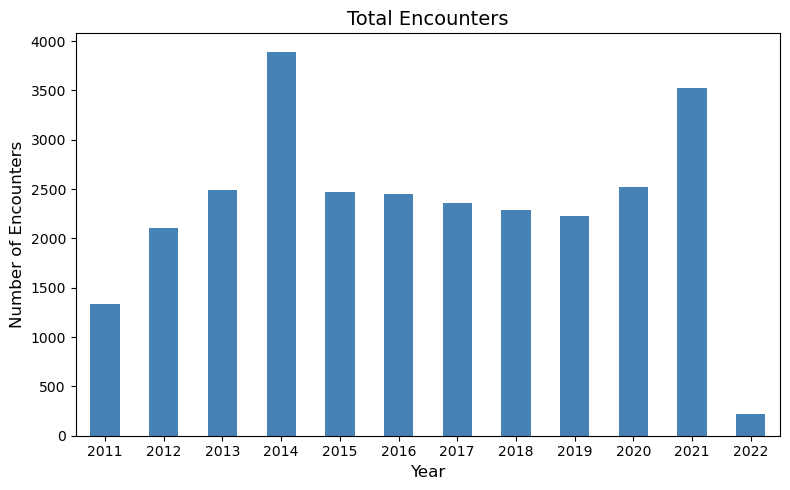

In [52]:
# plot bar chart
plt.figure(figsize = (8, 5))
yearly_encounter.plot(
    kind = 'bar', color = 'steelblue'
)

plt.title('Total Encounters', fontsize = 14)
plt.xlabel('Year', fontsize = 12)
plt.ylabel('Number of Encounters', fontsize = 12)
plt.xticks(rotation = 0)

plt.tight_layout()
plt.show()

The healthcare records span from Jan 02, 2011 to Feb 05, 2022. According to the total encounters chart, the number of encounters increased approximately 2.5 fold over the past decade, with notable peaks in 2014 - attributed to the influenza H3N2 outbreak and in 2021, driven by COVID-10 pandemic.

In [53]:
# number of encounters splited by encouter types
yearly_encounter_type = df.groupby(['year', 'encounterclass']).size().unstack(fill_value=0)
yearly_encounter_type

encounterclass,ambulatory,emergency,inpatient,outpatient,urgentcare,wellness
year,,,,,,
2011,667,55,83,327,30,174
2012,895,183,93,444,299,192
2013,1106,225,134,485,359,186
2014,2341,216,118,694,327,189
2015,1073,228,111,506,380,171
2016,1073,250,124,481,341,182
2017,987,218,126,475,385,169
2018,933,247,81,480,377,174
2019,846,227,134,456,397,168


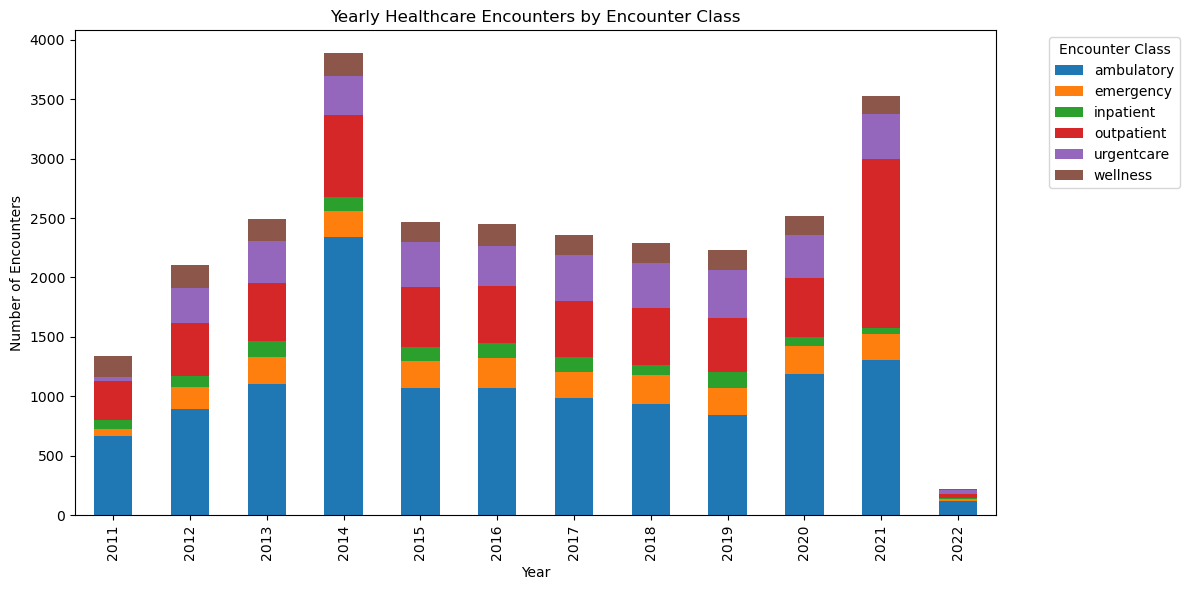

In [54]:
# plot a chart
yearly_encounter_type.plot(
    kind = 'bar', stacked = True, figsize = (12, 6)
)

plt.title('Yearly Healthcare Encounters by Encounter Class')
plt.xlabel('Year')
plt.ylabel('Number of Encounters')
plt.legend(title='Encounter Class', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

According to Total Encounters by Encounter Class chart, the increased proportion of ambulatory encounters in 2014 reflects the high demand for care during influenza outbreak. In contrast, the relatively smaller share of inpatient encounters and the expanded proportion of outpatient encounter during 2020-2021 illustrates the impact of social distancing measures implemented during COVID-19 pandemic.

In [55]:
# % of encounters splited by encounter types
yearly_encounter_prop = yearly_encounter_type.div(
    yearly_encounter_type.sum(axis=1),
    axis=0
)
yearly_encounter_prop

encounterclass,ambulatory,emergency,inpatient,outpatient,urgentcare,wellness
year,,,,,,
2011,0.499251,0.041168,0.062126,0.244760,0.022455,0.130240
2012,0.424976,0.086895,0.044160,0.210826,0.141975,0.091168
2013,0.443287,0.090180,0.053707,0.194389,0.143888,0.074549
2014,0.602574,0.055598,0.030373,0.178636,0.084170,0.048649
2015,0.434589,0.092345,0.044957,0.204941,0.153908,0.069259
2016,0.437780,0.101999,0.050592,0.196246,0.139127,0.074255
2017,0.418220,0.092373,0.053390,0.201271,0.163136,0.071610
2018,0.407068,0.107766,0.035340,0.209424,0.164485,0.075916
2019,0.379713,0.101885,0.060144,0.204668,0.178187,0.075404


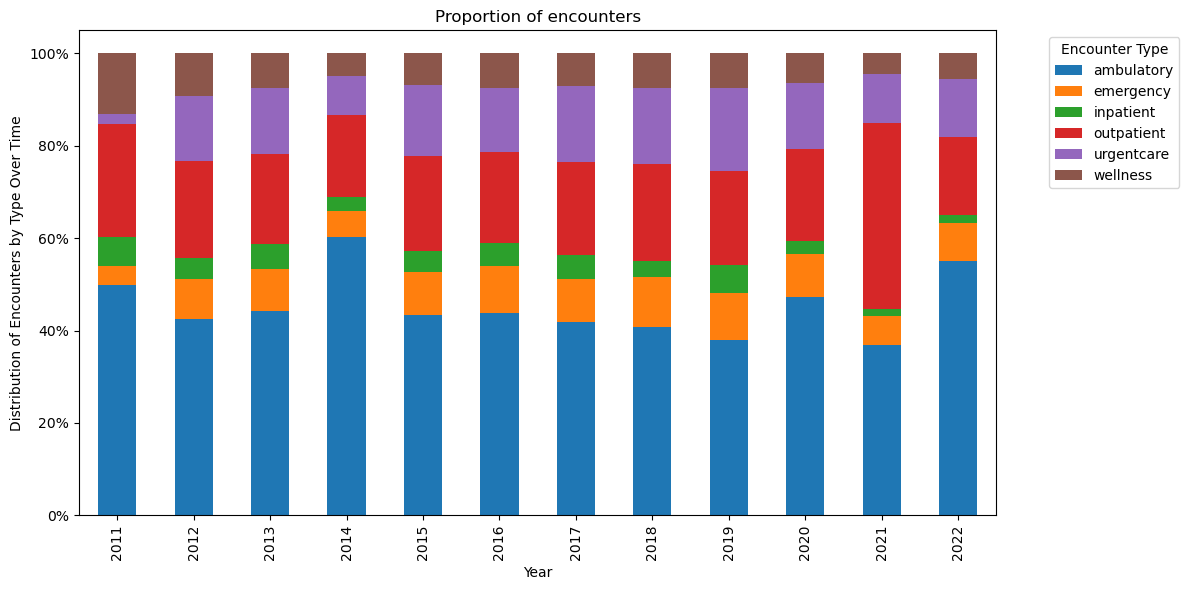

In [56]:
# plot a chart

import matplotlib.ticker as mtick

ax = yearly_encounter_prop.plot(
    kind='bar',
    stacked=True,
    figsize=(12, 6)
)

plt.title('Proportion of encounters')
plt.xlabel('Year')
plt.ylabel('Distribution of Encounters by Type Over Time')

# show percentages on y-axis
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))

plt.legend(title='Encounter Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


**Utilization per patient**

In [57]:
# number encounters per patient by mean
visit = (df
            .groupby(['year', 'patient'])
            .size()
            .reset_index(name = 'n_visit'))

# mean encounters per patient per year
mean_utilization = visit.groupby('year')['n_visit'].mean()

mean_utilization


year
2011    3.258537
2012    3.767442
2013    4.377193
2014    6.166667
2015    4.464738
2016    4.440217
2017    4.322344
2018    4.284112
2019    4.334630
2020    4.853565
2021    5.439137
2022    2.135922
Name: n_visit, dtype: float64

In [58]:
# number encounters per patient by median
visit = (df
            .groupby(['year', 'patient'])
            .size()
            .reset_index(name = 'n_visit'))

# mean encounters per patient per year
median_utilization = visit.groupby('year')['n_visit'].median()

median_utilization

year
2011    1.0
2012    2.0
2013    2.0
2014    3.0
2015    2.0
2016    2.0
2017    2.0
2018    2.0
2019    2.0
2020    2.0
2021    3.0
2022    1.0
Name: n_visit, dtype: float64

While the median patient had approximately 1–2 encounters per year, mean utilization was substantially higher, reflecting a skewed distribution driven by a smaller subset of high-utilizing patients.

In [59]:
# number of repeat encounters per patient for all encounter classes
repeat = (
    visit[visit['n_visit'] > 1]
    .groupby('year')['patient']
    .nunique()
)

repeat

year
2011    170
2012    306
2013    327
2014    445
2015    321
2016    323
2017    313
2018    320
2019    297
2020    321
2021    572
2022     31
Name: patient, dtype: int64

In [60]:
# repeat rate for all encounter classes
all_patients_per_year = (visit
                         .groupby('year')['patient']
                         .nunique()
)

repeat_rate = repeat / all_patients_per_year * 100
repeat_rate

year
2011    41.463415
2012    54.740608
2013    57.368421
2014    70.634921
2015    58.047016
2016    58.514493
2017    57.326007
2018    59.813084
2019    57.782101
2020    61.849711
2021    88.135593
2022    30.097087
Name: patient, dtype: float64

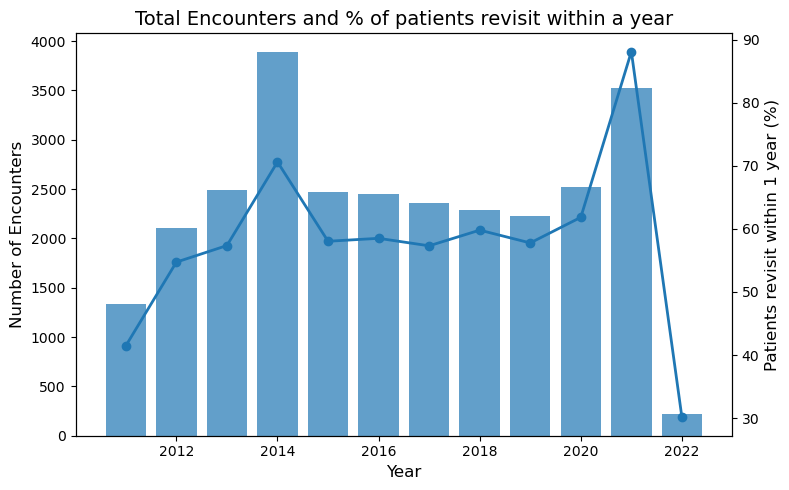

In [61]:
# create a chart of both encounter and repeat rate
years = yearly_encounter.index

fig, ax1 = plt.subplots(figsize=(8, 5))

# Bar chart: Total encounters
ax1.bar(
    years,
    yearly_encounter.values,
    alpha=0.7
)
ax1.set_xlabel("Year", fontsize=12)
ax1.set_ylabel("Number of Encounters", fontsize=12)
ax1.tick_params(axis='y')

# Line chart: Repeat rate
ax2 = ax1.twinx()
ax2.plot(
    years,
    repeat_rate.loc[years].values,
    marker='o',
    linewidth=2
)
ax2.set_ylabel("Patients revisit within 1 year (%)", fontsize=12)
ax2.tick_params(axis='y')


plt.title("Total Encounters and % of patients revisit within a year", fontsize=14)
plt.tight_layout()
plt.show()


In [62]:
# sort within patients
df = df.sort_values(['patient', 'start'])

In [63]:
# days between 2 conservative encounters for each patient
df['days_since_prv'] = df.groupby('patient')['start'].diff().dt.days
df['days_since_prv']

1292       NaN
1403      28.0
8398     882.0
9343     133.0
9579      30.0
         ...  
27477      7.0
27531      7.0
27632     14.0
27691      7.0
27749      7.0
Name: days_since_prv, Length: 27891, dtype: float64

In [64]:
df['repeat_within_30'] = df['days_since_prv'].between(0, 30, inclusive='both')
df['repeat_within_30']

1292     False
1403      True
8398     False
9343     False
9579      True
         ...  
27477     True
27531     True
27632     True
27691     True
27749     True
Name: repeat_within_30, Length: 27891, dtype: bool

In [65]:
# number of repeat patients within 30 days by year
repeate30_patients_by_year = (
df[df['repeat_within_30']]
.groupby(df['start'].dt.year)['patient']
.nunique()
)

In [66]:
all_patients_by_year = df.groupby(df['start'].dt.year)["patient"].nunique()



In [67]:
repeat30_rate = repeate30_patients_by_year  / all_patients_by_year * 100
repeat30_rate

start
2011    27.317073
2012    37.388193
2013    41.228070
2014    53.492063
2015    41.952984
2016    42.934783
2017    39.194139
2018    41.869159
2019    42.217899
2020    41.811175
2021    83.975347
2022    50.485437
Name: patient, dtype: float64

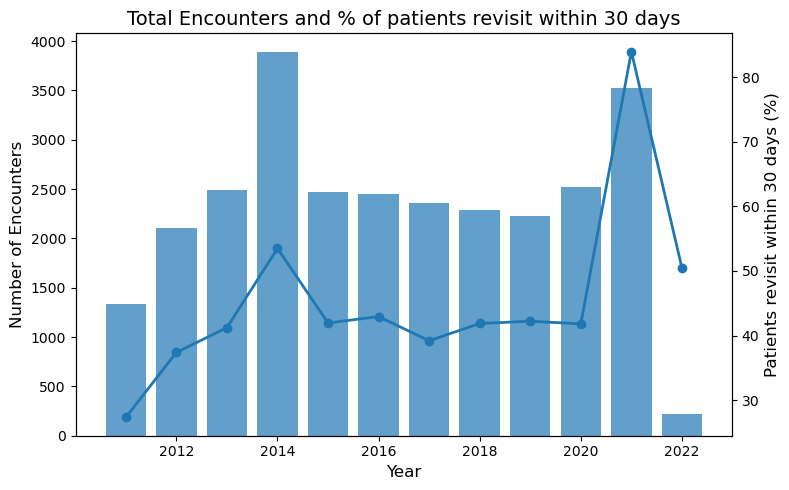

In [68]:
# create a chart of both number  and repeat rate
years = yearly_encounter.index

fig, ax1 = plt.subplots(figsize=(8, 5))

# Bar chart: Total encounters
ax1.bar(
    years,
    yearly_encounter.values,
    alpha=0.7
)
ax1.set_xlabel("Year", fontsize=12)
ax1.set_ylabel("Number of Encounters", fontsize=12)
ax1.tick_params(axis='y')

# Line chart: Repeat 30 rate
ax2 = ax1.twinx()
ax2.plot(
    years,
    repeat30_rate.loc[years].values,
    marker='o',
    linewidth=2
)
ax2.set_ylabel("Patients revisit within 30 days (%)", fontsize=12)
ax2.tick_params(axis='y')


plt.title("Total Encounters and % of patients revisit within 30 days", fontsize=14)
plt.tight_layout()
plt.show()

Despite overall repeat utilization, relatively few patients experience repeat encounters within 30 days. The low short-term repeat rate, even during periods of high encounter volume, suggests effective clinical resolution and appropriate care transitions.

**Admission Trends**

In [69]:
# number of inpatients by year
yearly_admission = (df[df['encounterclass'] == 'inpatient']
            .groupby('year')
            .size())
yearly_admission

year
2011     83
2012     93
2013    134
2014    118
2015    111
2016    124
2017    126
2018     81
2019    134
2020     72
2021     55
2022      4
dtype: int64

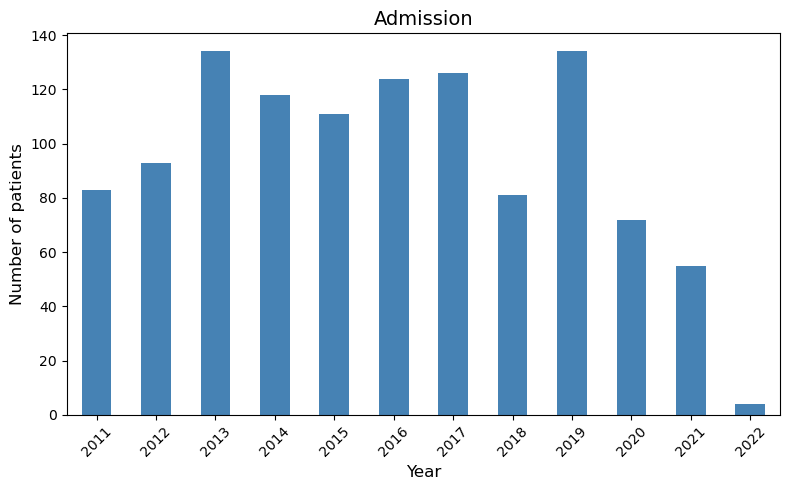

In [70]:
# plot bar chart
plt.figure(figsize = (8, 5))
yearly_admission.plot(
    kind = 'bar', color = 'steelblue')

plt.title('Admission', fontsize = 14)
plt.xlabel('Year', fontsize = 12)
plt.ylabel('Number of patients', fontsize = 12)
plt.xticks(rotation = 45)

plt.tight_layout()
plt.show()


**Procedure per Encounter**

In [71]:
mean_procedure = df.groupby('year')['procedure_count'].mean()
mean_procedure

year
2011    0.886228
2012    2.165717
2013    1.973547
2014    1.616216
2015    1.889834
2016    1.678091
2017    1.950847
2018    1.738656
2019    1.913824
2020    1.773720
2021    1.242776
2022    1.209091
Name: procedure_count, dtype: float64

In [72]:
median_procedure = df.groupby('year')['procedure_count'].median()
median_procedure

year
2011    0.0
2012    1.0
2013    1.0
2014    1.0
2015    1.0
2016    1.0
2017    1.0
2018    1.0
2019    1.0
2020    1.0
2021    0.0
2022    0.0
Name: procedure_count, dtype: float64

**Length of Stay (LOS)**

In [73]:
# length of stay of all patients
master_data['LOS_hour'] = (
    master_data['stop'] - master_data['start']
    ).dt.total_seconds() / 3600

master_data['LOS_hour'].describe(percentiles = [0.01, 0.05, 0.5, 0.95, 0.99])

count    27891.000000
mean         7.265995
std        398.323624
min          0.250000
1%           0.250000
5%           0.250000
50%          0.250000
95%          3.800000
99%         24.000000
max      44930.000000
Name: LOS_hour, dtype: float64

In [74]:
# length of stay splited by encounter class
master_data.groupby(['encounterclass'])['LOS_hour'].describe(percentiles = [0.01, 0.05, 0.5, 0.95, 0.99])

,count,mean,std,min,1%,5%,50%,95%,99%,max
encounterclass,,,,,,,,,,
ambulatory,12537.0,9.479418,570.670771,0.25,0.25,0.25,0.25,3.533333,3.900000,44930.000000
emergency,2322.0,1.541755,14.929700,1.00,1.00,1.00,1.00,1.000000,1.713167,589.000000
inpatient,1135.0,36.841586,249.147365,24.00,24.00,24.00,24.00,24.627472,220.394700,8250.004167
outpatient,6300.0,5.875872,207.116335,0.25,0.25,0.25,0.25,0.317806,1.039178,10704.000000
urgentcare,3666.0,0.250000,0.000000,0.25,0.25,0.25,0.25,0.250000,0.250000,0.250000
wellness,1931.0,0.250000,0.000000,0.25,0.25,0.25,0.25,0.250000,0.250000,0.250000


In [75]:
master_data['LOS_hours_log'] = np.log1p(master_data['LOS_hour'])


<Axes: >

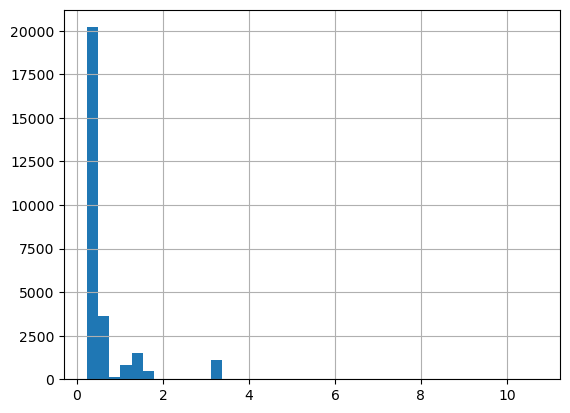

In [76]:
master_data['LOS_hours_log'].hist(bins=40)


encounterclass
ambulatory    Axes(0.125,0.11;0.775x0.77)
emergency     Axes(0.125,0.11;0.775x0.77)
inpatient     Axes(0.125,0.11;0.775x0.77)
outpatient    Axes(0.125,0.11;0.775x0.77)
urgentcare    Axes(0.125,0.11;0.775x0.77)
wellness      Axes(0.125,0.11;0.775x0.77)
Name: LOS_hours_log, dtype: object

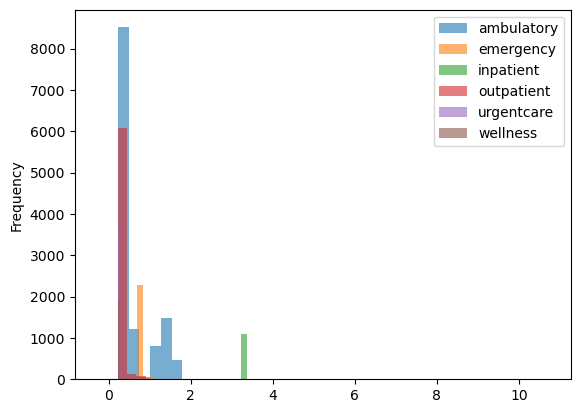

In [77]:
master_data.groupby('encounterclass')['LOS_hours_log'].plot(
    kind='hist',
    bins=40,
    alpha=0.6,
    legend=True
)


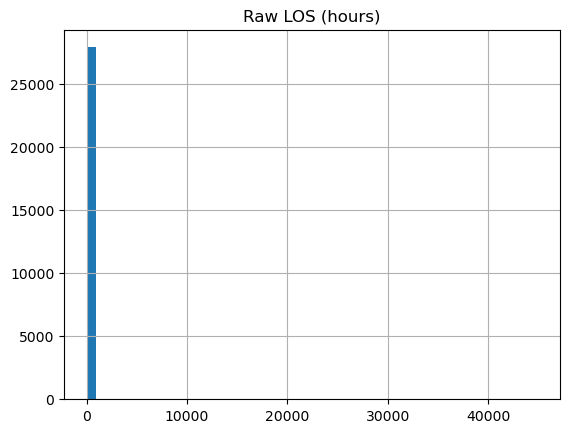

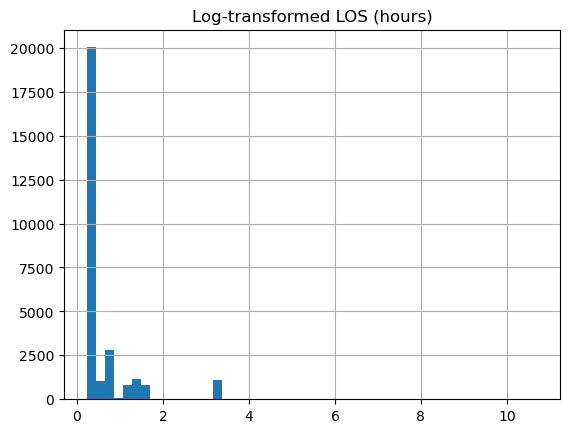

In [78]:
plt.figure()
master_data['LOS_hour'].hist(bins=50)
plt.title('Raw LOS (hours)')
plt.show()

plt.figure()
master_data['LOS_hours_log'].hist(bins=50)
plt.title('Log-transformed LOS (hours)')
plt.show()


In [79]:
master_data[['LOS_hour', 'LOS_hours_log']].describe()


,LOS_hour,LOS_hours_log
count,27891.000000,27891.000000
mean,7.265995,0.530044
std,398.323624,0.698741
min,0.250000,0.223144
25%,0.250000,0.223144
50%,0.250000,0.223144
75%,0.864167,0.622814
max,44930.000000,10.712883


**Cost**

In [80]:
(master_data['total_claim_cost']
 - master_data['base_encounter_cost']
).describe()

count     27891.000000
mean       3523.500560
std        9201.962042
min        -146.180000
25%           0.000000
50%         150.400000
75%        1312.320000
max      641794.990000
dtype: float64

In [81]:
mask = master_data['total_claim_cost'] < master_data['base_encounter_cost']
mask.sum(), mask.mean()


(89, 0.0031909935104514)

In [82]:
master_data.loc[mask, [
    'total_claim_cost',
    'base_encounter_cost',
    'payer_coverage',
    'encounterclass',
    'start',
    'stop'
]].sort_values(
    'total_claim_cost'
).head(10)


,total_claim_cost,base_encounter_cost,payer_coverage,encounterclass,start,stop
48,0.0,87.71,0.0,inpatient,2011-01-19 21:16:09+00:00,2011-01-20 21:16:09+00:00
18913,0.0,146.18,0.0,inpatient,2018-10-23 15:44:02+00:00,2018-10-24 15:44:02+00:00
18595,0.0,136.80,0.0,wellness,2018-08-29 04:02:51+00:00,2018-08-29 04:17:51+00:00
18356,0.0,136.80,0.0,wellness,2018-07-21 16:39:56+00:00,2018-07-21 16:54:56+00:00
18169,0.0,146.18,0.0,inpatient,2018-06-17 15:02:34+00:00,2018-06-18 15:02:34+00:00
18077,0.0,136.80,0.0,wellness,2018-06-03 01:28:36+00:00,2018-06-03 01:43:36+00:00
17993,0.0,146.18,0.0,inpatient,2018-05-21 01:28:36+00:00,2018-05-22 01:28:36+00:00
17938,0.0,136.80,0.0,wellness,2018-05-12 20:40:00+00:00,2018-05-12 20:55:00+00:00
17859,0.0,146.18,0.0,emergency,2018-05-01 13:39:00+00:00,2018-05-01 14:39:00+00:00
19638,0.0,136.80,0.0,wellness,2019-02-07 07:47:14+00:00,2019-02-07 08:02:14+00:00


In [83]:
(master_data['payer_coverage'] > master_data['total_claim_cost']).sum()


0

In [84]:
master_data['addon_cost'] = (
    master_data['total_claim_cost']
    - master_data['base_encounter_cost']
).clip(lower=0)


**Average Cost per Encounter**

In [85]:
# mean cost per encouter for all encouter classes
mean_cost = df.groupby('year')['total_claim_cost'].mean()
mean_cost

year
2011    3297.856834
2012    4301.193780
2013    4050.209567
2014    3091.804934
2015    4100.709959
2016    3421.746683
2017    4066.480708
2018    3816.238381
2019    4001.498555
2020    4086.573227
2021    2599.782436
2022    3143.063909
Name: total_claim_cost, dtype: float64

In [86]:
# median cost per encouter for all encouter classes
median_cost = df.groupby('year')['total_claim_cost'].median()
median_cost

year
2011    278.550
2012    463.750
2013    310.210
2014    573.980
2015    278.580
2016    317.480
2017    310.640
2018    236.630
2019    341.550
2020    234.720
2021    278.580
2022    147.025
Name: total_claim_cost, dtype: float64

In [87]:
# mean cost per encouter by encouter classes
mean_cost_by_type= (df.groupby(['year','encounterclass']).agg(avg_cost = ('total_claim_cost', 'mean'), n_counters = ('total_claim_cost', 'size')))
mean_cost_by_type

avg_cost  n_counters
year encounterclass                          
2011 ambulatory       2237.375472         667
     emergency        4481.101636          55
     inpatient       12697.500964          83
     outpatient       1760.068593         327
     urgentcare       8920.792667          30
...                           ...         ...
2022 emergency        6930.692222          18
     inpatient         743.057500           4
     outpatient       3810.240811          37
     urgentcare       5684.328571          28
     wellness         4296.850833          12

[72 rows x 2 columns]

In [88]:
with pd.option_context('display.max.row', None):
    display(mean_cost_by_type)

avg_cost  n_counters
year encounterclass                          
2011 ambulatory       2237.375472         667
     emergency        4481.101636          55
     inpatient       12697.500964          83
     outpatient       1760.068593         327
     urgentcare       8920.792667          30
     wellness         4425.792586         174
2012 ambulatory       4029.438246         895
     emergency        5103.162678         183
     inpatient        9033.276344          93
     outpatient       2311.278761         444
     urgentcare       6333.888829         299
     wellness         3947.671198         192
2013 ambulatory       3218.934141        1106
     emergency        3714.894267         225
     inpatient        6265.157761         134
     outpatient       2783.753814         485
     urgentcare       7874.915850         359
     wellness         3723.300914         186
2014 ambulatory       2566.247074        2341
     emergency        4507.156019         216
     inpatient        8436.585763         118
     outpatient       1980.937089         694
     urgentcare       6186.492538         327
     wellness         3371.754233         189
2015 ambulatory       3620.405909        1073
     emergency        3926.324298         228
     inpatient        9549.272703         111
     outpatient       2462.181225         506
     urgentcare       6141.064211         380
     wellness         4124.666901         171
2016 ambulatory       2487.387829        1073
     emergency        4050.895720         250
     inpatient        6734.210726         124
     outpatient       2276.962973         481
     urgentcare       5732.444868         341
     wellness         4505.412253         182
2017 ambulatory       3650.908349         987
     emergency        3891.815092         218
     inpatient        6939.798175         126
     outpatient       2658.147558         475
     urgentcare       5940.577688         385
     wellness         4265.533550         169
2018 ambulatory       3023.584566         933
     emergency        4694.569838         247
     inpatient        6352.858148          81
     outpatient       2693.554229         480
     urgentcare       5836.080159         377
     wellness         4359.571609         174
2019 ambulatory       3154.152340         846
     emergency        5245.215639         227
     inpatient        2912.455224         134
     outpatient       2793.026820         456
     urgentcare       6551.791234         397
     wellness         4710.188095         168
2020 ambulatory       2356.410998        1192
     emergency        6487.504487         234
     inpatient       14051.598194          72
     outpatient       3511.166378         497
     urgentcare       6698.975288         365
     wellness         4813.014214         159
2021 ambulatory       2263.716922        1303
     emergency        4574.309910         221
     inpatient        7111.545818          55
     outpatient       1207.382327        1418
     urgentcare       6234.853280         378
     wellness         4881.991355         155
2022 ambulatory       1752.454959         121
     emergency        6930.692222          18
     inpatient         743.057500           4
     outpatient       3810.240811          37
     urgentcare       5684.328571          28
     wellness         4296.850833          12

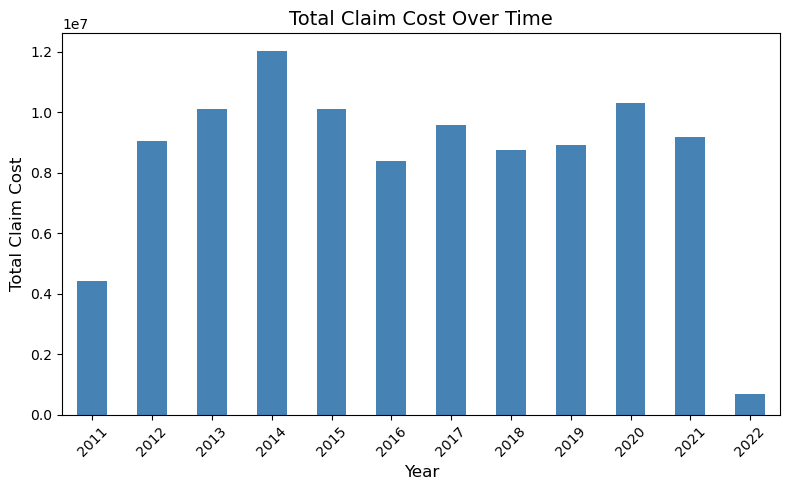

In [89]:
# create a bar chart of total cost growth over time
yearly_cost = (df.groupby('year')['total_claim_cost'].sum().sort_index())

plt.figure(figsize = (8, 5))
yearly_cost.plot(
    kind = 'bar', color = 'steelblue')

plt.title('Total Claim Cost Over Time', fontsize = 14)
plt.xlabel('Year', fontsize = 12)
plt.ylabel('Total Claim Cost', fontsize = 12)
plt.xticks(rotation = 45)

plt.tight_layout()
plt.show()

In [90]:
yearly_growth = yearly_cost.pct_change() * 100

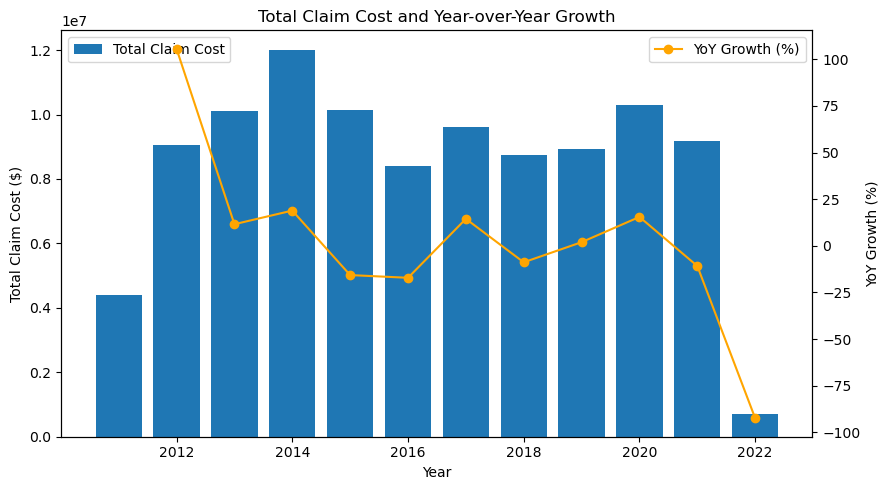

In [91]:
fig, ax1 = plt.subplots(figsize=(9, 5))

# Left axis — Total Cost (bars)
ax1.bar(yearly_cost.index, yearly_cost.values)
ax1.set_xlabel('Year')
ax1.set_ylabel('Total Claim Cost ($)')
ax1.tick_params(axis='y')

# Right axis — YoY Growth (line)
ax2 = ax1.twinx()
ax2.plot(yearly_growth.index, yearly_growth.values, marker='o', color='orange')
ax2.set_ylabel('YoY Growth (%)')
ax2.tick_params(axis='y')

# Title
plt.title('Total Claim Cost and Year-over-Year Growth')

# Legend
ax1.legend(['Total Claim Cost'], loc='upper left')
ax2.legend(['YoY Growth (%)'], loc='upper right')

plt.tight_layout()
plt.show()


In [92]:
cost_by_year = (df.groupby('year').agg(total_procedure_cost = ('total_procedure_cost','sum'), total_claim_cost = ('total_claim_cost', 'sum')))
cost_by_year

,total_procedure_cost,total_claim_cost
year,,
2011,2756770,4405936.73
2012,9476361,9058314.10
2013,10828024,10105272.87
2014,12532053,12011662.17
2015,10598029,10124652.89
2016,8827809,8386701.12
2017,10205230,9596894.47
2018,9224463,8746818.37
2019,9589999,8915338.78


In [93]:
procedure_cost_share = (
    df.groupby('year')['total_procedure_cost'].sum()
    / df.groupby('year')['total_claim_cost'].sum()
)*100

procedure_cost_share

year
2011     62.569441
2012    104.615063
2013    107.152218
2014    104.332380
2015    104.675480
2016    105.259611
2017    106.338879
2018    105.460781
2019    107.567410
2020    109.407944
2021    103.542887
2022    103.266781
dtype: float64

The total procedure cost per encounter is larger than total claim cost, that's a red flag

**Payers & Coverage exposure**

In [94]:
payers['name']

0             Dual Eligible
1                  Medicare
2                  Medicaid
3                    Humana
4    Blue Cross Blue Shield
5          UnitedHealthcare
6                     Aetna
7              Cigna Health
8                    Anthem
9              NO_INSURANCE
Name: name, dtype: object

In [95]:
payer_map = {
    'Medicare': 'Medicare',
    'Dual Eligible': 'Medicare',
    'Medicaid': 'Medicaid',
    'NO_INSURANCE': 'Uninsured',
    'Humana': 'Private',
    'Blue Cross Blue Shield': 'Private',
    'UnitedHealthcare': 'Private',
    'Aetna': 'Private',
    'Cigna Health': 'Private',
    'Anthem': 'Private'
}

In [96]:
df['payer_group'] = df['payer_name'].map(payer_map)
df.columns

Index(['id', 'start', 'stop', 'patient', 'organization', 'payer',
       'encounterclass', 'code', 'description', 'base_encounter_cost',
       'total_claim_cost', 'payer_coverage', 'reasoncode', 'reasondescription',
       'payer_name', 'encounter', 'procedure_count', 'total_procedure_cost',
       'avg_procedure_cost', 'year', 'days_since_prv', 'repeat_within_30',
       'payer_group'],
      dtype='object')

In [97]:
df['payer_group'].isna().value_counts()


payer_group
False    27891
Name: count, dtype: int64

In [98]:
payer_coverage = df.groupby(['year', 'payer_group'])['payer_coverage'].sum()
payer_coverage

year  payer_group
2011  Medicaid        270082.37
      Medicare       1705124.23
      Private         114931.82
      Uninsured            0.00
2012  Medicaid        581036.65
      Medicare       1889801.81
      Private         402516.51
      Uninsured            0.00
2013  Medicaid       1173562.53
      Medicare       2038284.42
      Private         211141.01
      Uninsured            0.00
2014  Medicaid       1314254.08
      Medicare       2100180.20
      Private         137293.93
      Uninsured            0.00
2015  Medicaid       1092688.80
      Medicare       1688994.22
      Private         190733.22
      Uninsured            0.00
2016  Medicaid        449161.99
      Medicare       1488805.51
      Private         214978.56
      Uninsured            0.00
2017  Medicaid       1240127.23
      Medicare       1426935.44
      Private         322937.50
      Uninsured            0.00
2018  Medicaid        526403.45
      Medicare       1386963.26
      Private         

In [99]:
payer_cost = df.groupby(['year', 'payer_group'])['total_claim_cost'].sum()
payer_cost

year  payer_group
2011  Medicaid        288082.02
      Medicare       2158535.00
      Private         609082.27
      Uninsured      1350237.44
2012  Medicaid        618359.90
      Medicare       2391507.36
      Private        1500540.36
      Uninsured      4547906.48
2013  Medicaid       1246285.61
      Medicare       2590908.56
      Private        1479689.95
      Uninsured      4788388.75
2014  Medicaid       1398245.90
      Medicare       2689222.26
      Private        2799365.24
      Uninsured      5124828.77
2015  Medicaid       1160590.75
      Medicare       2153414.31
      Private        1438693.57
      Uninsured      5371954.26
2016  Medicaid        479096.37
      Medicare       1893829.22
      Private        1407273.00
      Uninsured      4606502.53
2017  Medicaid       1315352.76
      Medicare       1830642.43
      Private        1831825.82
      Uninsured      4619073.46
2018  Medicaid        560680.95
      Medicare       1766222.01
      Private        1

In [100]:
payer_volumn = df.groupby(['year', 'payer_group'])['id'].nunique()
payer_volumn

year  payer_group
2011  Medicaid         56
      Medicare        591
      Private         265
      Uninsured       424
2012  Medicaid        105
      Medicare        849
      Private         399
      Uninsured       753
2013  Medicaid        164
      Medicare       1005
      Private         404
      Uninsured       922
2014  Medicaid        221
      Medicare       1579
      Private         960
      Uninsured      1125
2015  Medicaid        164
      Medicare       1038
      Private         433
      Uninsured       834
2016  Medicaid        104
      Medicare       1063
      Private         452
      Uninsured       832
2017  Medicaid        157
      Medicare       1065
      Private         452
      Uninsured       686
2018  Medicaid        106
      Medicare        939
      Private         456
      Uninsured       791
2019  Medicaid        122
      Medicare       1113
      Private         383
      Uninsured       610
2020  Medicaid         97
      Medicare      

**Coverage by Payers**

In [101]:
# Coverage ratio overview
coverage_ratio = (
    df.groupby('year')['payer_coverage'].sum()
    / df.groupby('year')['total_claim_cost'].sum()
) * 100

coverage_ratio

year
2011    47.439138
2012    31.720637
2013    33.873286
2014    29.568999
2015    29.358204
2016    25.670952
2017    31.155914
2018    23.035029
2019    32.100282
2020    29.505910
2021    31.246164
2022    37.942073
dtype: float64

<Axes: title={'center': 'Insurance Coverage Ratio Over Time'}, xlabel='year'>

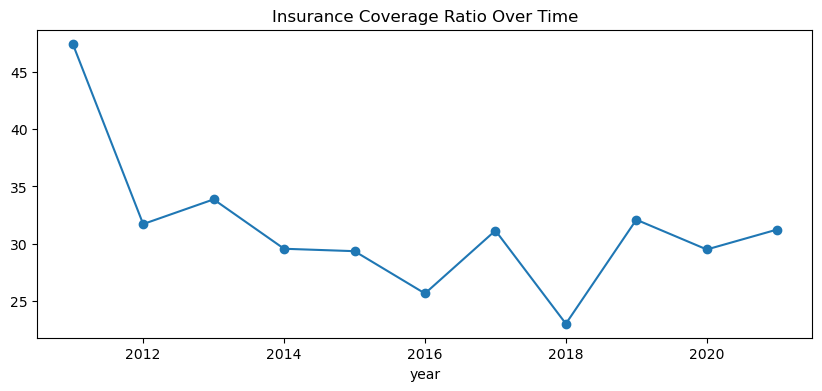

In [102]:
# plot a chart
coverage_ratio.loc[2011:2021].plot(
    figsize=(10,4),
    marker='o',
    title='Insurance Coverage Ratio Over Time'
)


In [103]:
#Coverage ratio by payer group
coverage_ratio_by_payer = (
    df.groupby(['year', 'payer_group'])['payer_coverage'].sum()
    / df.groupby(['year', 'payer_group'])['total_claim_cost'].sum()
) * 100
coverage_ratio_by_payer

year  payer_group
2011  Medicaid       93.751901
      Medicare       78.994514
      Private        18.869671
      Uninsured       0.000000
2012  Medicaid       93.964154
      Medicare       79.021367
      Private        26.824771
      Uninsured       0.000000
2013  Medicaid       94.164814
      Medicare       78.670643
      Private        14.269274
      Uninsured       0.000000
2014  Medicaid       93.993058
      Medicare       78.096193
      Private         4.904466
      Uninsured       0.000000
2015  Medicaid       94.149363
      Medicare       78.433315
      Private        13.257390
      Uninsured       0.000000
2016  Medicaid       93.751908
      Medicare       78.613504
      Private        15.276251
      Uninsured       0.000000
2017  Medicaid       94.280962
      Medicare       77.947250
      Private        17.629269
      Uninsured       0.000000
2018  Medicaid       93.886452
      Medicare       78.527119
      Private         8.227968
      Uninsured      

**Out-Of-Pocket**

In [104]:
# Out-of-pocket cost overview
oop_cost_by_year = (
    df.groupby('year')['total_claim_cost'].sum()
    - df.groupby('year')['payer_coverage'].sum()
)

oop_share = oop_cost_by_year / df.groupby('year')['total_claim_cost'].sum() * 100

oop_share

year
2011    52.560862
2012    68.279363
2013    66.126714
2014    70.431001
2015    70.641796
2016    74.329048
2017    68.844086
2018    76.964971
2019    67.899718
2020    70.494090
2021    68.753836
2022    62.057927
dtype: float64

<Axes: title={'center': 'Out-of-Pocket Share of Total Cost'}, xlabel='year'>

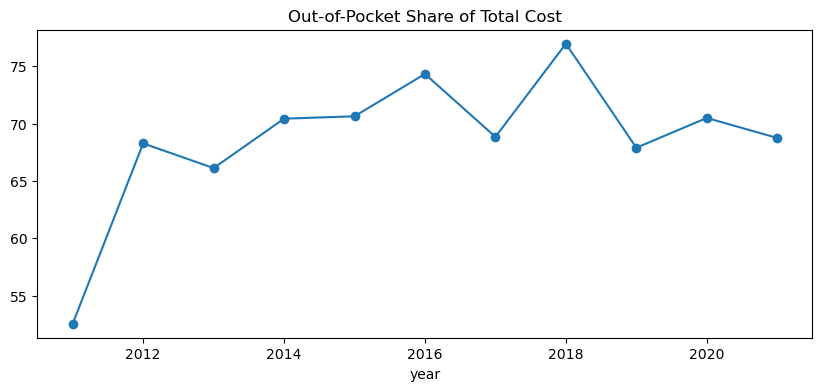

In [105]:
oop_share.loc[2011:2021].plot(
    figsize=(10,4),
    marker='o',
    title='Out-of-Pocket Share of Total Cost'
)


In [106]:
oop_by_payer = (
    df.groupby(['year', 'payer_group'])['total_claim_cost'].sum()
    - df.groupby(['year', 'payer_group'])['payer_coverage'].sum()
)

oop_by_payer

year  payer_group
2011  Medicaid         17999.65
      Medicare        453410.77
      Private         494150.45
      Uninsured      1350237.44
2012  Medicaid         37323.25
      Medicare        501705.55
      Private        1098023.85
      Uninsured      4547906.48
2013  Medicaid         72723.08
      Medicare        552624.14
      Private        1268548.94
      Uninsured      4788388.75
2014  Medicaid         83991.82
      Medicare        589042.06
      Private        2662071.31
      Uninsured      5124828.77
2015  Medicaid         67901.95
      Medicare        464420.09
      Private        1247960.35
      Uninsured      5371954.26
2016  Medicaid         29934.38
      Medicare        405023.71
      Private        1192294.44
      Uninsured      4606502.53
2017  Medicaid         75225.53
      Medicare        403706.99
      Private        1508888.32
      Uninsured      4619073.46
2018  Medicaid         34277.50
      Medicare        379258.75
      Private        1

In [107]:
cost_components = (
    df.groupby('year')
      .agg(
          total_cost=('total_claim_cost', 'sum'),
          payer_coverage=('payer_coverage', 'sum')
      )
)

cost_components['patient_burden'] = (
    cost_components['total_cost']
    - cost_components['payer_coverage']
)

# Exclude partial year if needed
cost_components = cost_components.loc[2011:2021]

cost_components

,total_cost,payer_coverage,patient_burden
year,,,
2011,4405936.73,2090138.42,2315798.31
2012,9058314.10,2873354.97,6184959.13
2013,10105272.87,3422987.96,6682284.91
2014,12011662.17,3551728.21,8459933.96
2015,10124652.89,2972416.24,7152236.65
2016,8386701.12,2152946.06,6233755.06
2017,9596894.47,2990000.17,6606894.30
2018,8746818.37,2014832.15,6731986.22
2019,8915338.78,2861848.88,6053489.90


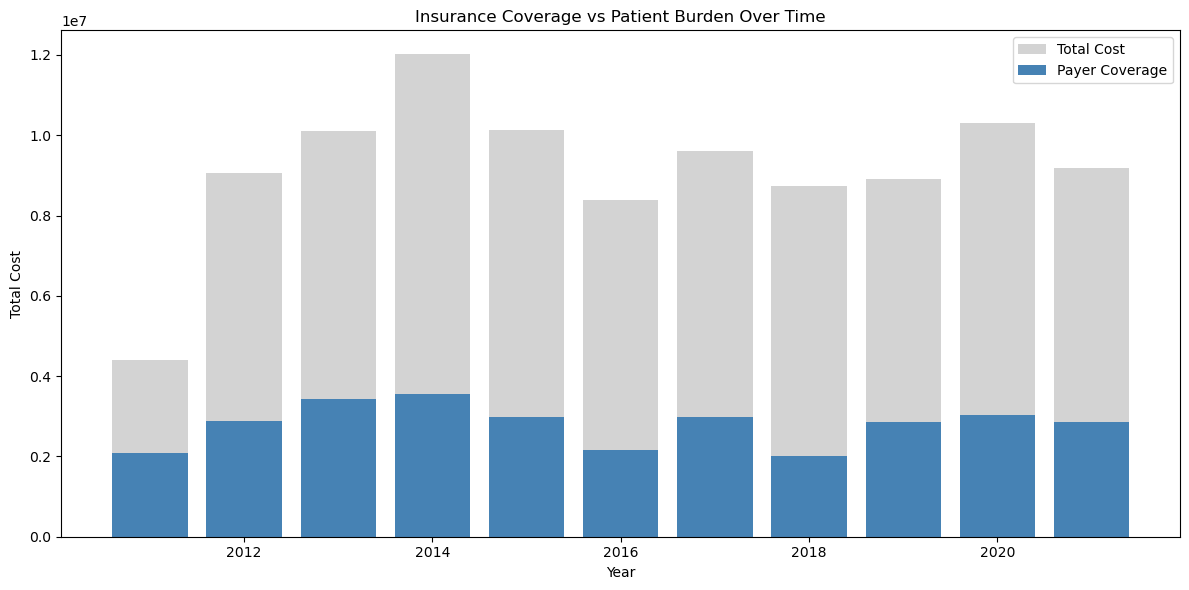

In [108]:
fig, ax = plt.subplots(figsize=(12, 6))

years = cost_components.index
total_cost = cost_components['total_cost']
payer_paid = cost_components['payer_coverage']

# Full bar = total cost
ax.bar(
    years,
    total_cost,
    color='lightgray',
    label='Total Cost'
)

# Filled portion = payer coverage
ax.bar(
    years,
    payer_paid,
    color='steelblue',
    label='Payer Coverage'
)

ax.set_ylabel('Total Cost')
ax.set_xlabel('Year')
ax.set_title('Insurance Coverage vs Patient Burden Over Time')

plt.legend()
plt.tight_layout()
plt.show()


**Top Diagnoses**

Total Claim Cost is largely influenced by the cost of procedures performed during treatment. By identifying high-cost procedures, we can better understand which procedures disproportionately drive high-cost encounters and overall spending.

In [148]:
# top 5 procedures by total cost
top_procedures = (df
                    .groupby('reasondescription', as_index=False)
                    .agg(total_claim_cost = ('total_claim_cost', 'sum'))
                  .sort_values('total_claim_cost',ascending=False)
                  .head(5))
top_procedures

,reasondescription,total_claim_cost
49,Normal pregnancy,20920672.75
11,COVID-19,1226413.90
43,Malignant neoplasm of breast (disorder),1158205.08
13,Chronic congestive heart failure (disorder),933207.46
2,Acute bronchitis (disorder),662061.50


In [149]:
top_5_list = top_procedures['reasondescription']

filtered = df[df['reasondescription'].isin(top_5_list)]

filtered

,id,start,stop,patient,organization,payer,encounterclass,code,description,base_encounter_cost,...,reasondescription,payer_name,encounter,procedure_count,total_procedure_cost,avg_procedure_cost,year,days_since_prv,repeat_within_30,payer_group
2898,587461a5-6e79-0047-86a6-89d076011134,2012-09-28 11:15:07+00:00,2012-09-28 11:30:07+00:00,0034fe01-207f-275f-6b4b-821f7b0af044,d78e84ec-30aa-3bba-a33a-f29a3a454662,047f6ec3-6215-35eb-9608-f9dda363a44c,ambulatory,424441002,Prenatal initial visit,142.58,...,Normal pregnancy,Cigna Health,587461a5-6e79-0047-86a6-89d076011134,20,56070,2803.500000,2012,54.0,False,Private
3042,3a9f736c-1063-774a-bcaf-eb7e0f737bc6,2012-10-26 11:15:07+00:00,2012-10-26 11:30:07+00:00,0034fe01-207f-275f-6b4b-821f7b0af044,d78e84ec-30aa-3bba-a33a-f29a3a454662,047f6ec3-6215-35eb-9608-f9dda363a44c,ambulatory,424619006,Prenatal visit,142.58,...,Normal pregnancy,Cigna Health,3a9f736c-1063-774a-bcaf-eb7e0f737bc6,3,16495,5498.333333,2012,28.0,True,Private
3215,89240a1c-f0bd-5ced-0f81-e106a9ef079a,2012-11-23 11:15:07+00:00,2012-11-23 11:30:07+00:00,0034fe01-207f-275f-6b4b-821f7b0af044,d78e84ec-30aa-3bba-a33a-f29a3a454662,b1c428d6-4f07-31e0-90f0-68ffa6ff8c76,ambulatory,424619006,Prenatal visit,142.58,...,Normal pregnancy,NO_INSURANCE,89240a1c-f0bd-5ced-0f81-e106a9ef079a,4,12772,3193.000000,2012,28.0,True,Uninsured
3379,6b2d2725-000d-b1d6-4ddd-f28961bafea3,2012-12-21 11:15:07+00:00,2012-12-21 11:30:07+00:00,0034fe01-207f-275f-6b4b-821f7b0af044,d78e84ec-30aa-3bba-a33a-f29a3a454662,b1c428d6-4f07-31e0-90f0-68ffa6ff8c76,ambulatory,424619006,Prenatal visit,142.58,...,Normal pregnancy,NO_INSURANCE,6b2d2725-000d-b1d6-4ddd-f28961bafea3,2,9327,4663.500000,2012,28.0,True,Uninsured
3540,ae7f9663-c366-22d3-159e-92faa6bd2c0c,2013-01-18 11:15:07+00:00,2013-01-18 11:30:07+00:00,0034fe01-207f-275f-6b4b-821f7b0af044,d78e84ec-30aa-3bba-a33a-f29a3a454662,b1c428d6-4f07-31e0-90f0-68ffa6ff8c76,ambulatory,424619006,Prenatal visit,142.58,...,Normal pregnancy,NO_INSURANCE,ae7f9663-c366-22d3-159e-92faa6bd2c0c,2,11711,5855.500000,2013,28.0,True,Uninsured
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27010,cb39076d-b2e7-cec5-09a3-3c5dc808eafb,2021-10-09 20:35:37+00:00,2021-10-09 20:50:37+00:00,ff1b3c26-53a6-4590-ce79-a3f7269274ea,d78e84ec-30aa-3bba-a33a-f29a3a454662,b1c428d6-4f07-31e0-90f0-68ffa6ff8c76,ambulatory,424619006,Prenatal visit,142.58,...,Normal pregnancy,NO_INSURANCE,cb39076d-b2e7-cec5-09a3-3c5dc808eafb,2,15189,7594.500000,2021,28.0,True,Uninsured
27229,19ba62b6-7565-e0fd-4a5d-c5ef64f247ff,2021-11-06 20:35:37+00:00,2021-11-06 20:50:37+00:00,ff1b3c26-53a6-4590-ce79-a3f7269274ea,d78e84ec-30aa-3bba-a33a-f29a3a454662,b1c428d6-4f07-31e0-90f0-68ffa6ff8c76,ambulatory,424619006,Prenatal visit,142.58,...,Normal pregnancy,NO_INSURANCE,19ba62b6-7565-e0fd-4a5d-c5ef64f247ff,2,9970,4985.000000,2021,28.0,True,Uninsured
27466,2c9b7680-fc12-73d8-a9f0-bf5144328599,2021-12-04 20:35:37+00:00,2021-12-04 20:50:37+00:00,ff1b3c26-53a6-4590-ce79-a3f7269274ea,d78e84ec-30aa-3bba-a33a-f29a3a454662,b1c428d6-4f07-31e0-90f0-68ffa6ff8c76,ambulatory,424619006,Prenatal visit,142.58,...,Normal pregnancy,NO_INSURANCE,2c9b7680-fc12-73d8-a9f0-bf5144328599,5,14612,2922.400000,2021,28.0,True,Uninsured
27678,d3daf72d-96d7-d706-8a0f-aaa916f9e180,2022-01-01 20:35:37+00:00,2022-01-01 20:50:37+00:00,ff1b3c26-53a6-4590-ce79-a3f7269274ea,d78e84ec-30aa-3bba-a33a-f29a3a454662,b1c428d6-4f07-31e0-90f0-68ffa6ff8c76,ambulatory,424619006,Prenatal visit,142.58,...,Normal pregnancy,NO_INSURANCE,d3daf72d-96d7-d706-8a0f-aaa916f9e180,2,15140,7570.000000,2022,28.0,True,Uninsured


In [150]:
yearly_total_cost = (
    filtered
    .groupby(['reasondescription','year'], as_index = False)
    .agg(total_claim_cost = ('total_claim_cost', 'sum'))
)

yearly_total_cost

,reasondescription,year,total_claim_cost
0,Acute bronchitis (disorder),2011,44993.06
1,Acute bronchitis (disorder),2012,78062.73
2,Acute bronchitis (disorder),2013,88596.49
3,Acute bronchitis (disorder),2014,33962.42
4,Acute bronchitis (disorder),2015,62191.39
5,Acute bronchitis (disorder),2016,74649.48
6,Acute bronchitis (disorder),2017,54484.37
7,Acute bronchitis (disorder),2018,88013.13
8,Acute bronchitis (disorder),2019,42308.27
9,Acute bronchitis (disorder),2020,28256.43


In [152]:
yearly_total_cost['yoy_growth_pct'] = (
    yearly_total_cost
      .sort_values(['reasondescription', 'year'])
      .groupby('reasondescription')['total_claim_cost']
      .pct_change()
)


In [155]:
fastest_growth = (
    yearly_total_cost
      .dropna(subset=['yoy_growth_pct'])
      .sort_values(['year','yoy_growth_pct'], ascending=[True,False])
)

fastest_growth


,reasondescription,year,total_claim_cost,yoy_growth_pct
39,Normal pregnancy,2012,2311086.06,2.844939
27,Malignant neoplasm of breast (disorder),2012,103823.87,1.090104
1,Acute bronchitis (disorder),2012,78062.73,0.734995
15,Chronic congestive heart failure (disorder),2012,47213.15,-0.665371
16,Chronic congestive heart failure (disorder),2013,105126.76,1.226642
28,Malignant neoplasm of breast (disorder),2013,119475.70,0.150754
2,Acute bronchitis (disorder),2013,88596.49,0.134940
40,Normal pregnancy,2013,2202345.05,-0.047052
29,Malignant neoplasm of breast (disorder),2014,159472.60,0.334770
41,Normal pregnancy,2014,2644992.95,0.200989


In [147]:
df.columns

Index(['id', 'start', 'stop', 'patient', 'organization', 'payer',
       'encounterclass', 'code', 'description', 'base_encounter_cost',
       'total_claim_cost', 'payer_coverage', 'reasoncode', 'reasondescription',
       'payer_name', 'encounter', 'procedure_count', 'total_procedure_cost',
       'avg_procedure_cost', 'year', 'days_since_prv', 'repeat_within_30',
       'payer_group'],
      dtype='object')

#### **5. Data Exporting**

In [ ]:
df.to_csv('/Users/hna/Documents/DA/Portfolio/Massachusetts Hospital/df.csv', index=False)